In [11]:
import os
import sys
from datetime import datetime as dt

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

COLORS = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897', '#f6bd60', '#e76f51', '#2a9d8f', "#c77dff", "#f7d6e0"]
COLORS_20 = ["#adb5bd", "#7ec4cf", '#4F6272', "#3de0fe", "#c77dff", '#B7C3F3', '#2d6a4f', '#2a9d8f', '#8EB897',
             '#9a8c98',
             '#f6bd60', '#8a5a44', "#ede7b1", "#ff9505", '#e29578', '#f5cac3', "#f7d6e0", '#DD7596', '#DD7596',
             "#8c2f39", "#d0ee11",
             ]
COLORS_16 = ["#adb5bd", '#4F6272', "#c77dff", '#B7C3F3', '#2d6a4f', '#2a9d8f', '#8EB897', '#9a8c98',
             '#f6bd60', "#ede7b1", '#e29578', '#f5cac3', "#f7d6e0", '#DD7596', '#DD7596', "#8c2f39"]
greens = ["#004225", "#529471", "#48b5c4", "#529471"]


In [4]:
sys.path.append('/Users/noamazmon/PycharmProjects/network_modularity/analsis/')


In [19]:
results_path = "/Volumes/noamaz/modularity/digits/"
local_base_path = '/Users/noamazmon/PycharmProjects/network_modularity'
task_name = 'Digit recognition'
task = "digits"
dims = [64,6,6,10]
num_layers = str(len(dims) -1)
_, dim1, dim2,  _ = dims
time_str = dt.now().strftime("%Y-%m-%d-%H-%M-%S")
res_folder = f"{task}_{num_layers}_layers_{dim1}_{dim2}"
plot_path = f"{local_base_path}/plots/for_poster/{res_folder}"


In [20]:
first_analsis_res_folder = f"{results_path}/{res_folder}/first_analysis_results"
first_analsis_file_name = f"2023-09-10-10-15-41_all_results_from_teach_archs_results_with_motifs_2000_ep.csv"
lgbm_folder_name = 'exp_2023_10_17_10_57_0_nice_features'


In [21]:
first_analsis = pd.read_csv(f"{first_analsis_res_folder}/{first_analsis_file_name}").rename(
    columns={'connectivity_ratio': 'density',
             }).sort_values('mean_performance', ascending=False)


FileNotFoundError: [Errno 2] No such file or directory: '/Users/noamazmon/PycharmProjects/network_modularity/plots/for_poster/digits_3_layers_6_6/2023-10-19-15-26-15_digits_mean_performance_vs_density.png'

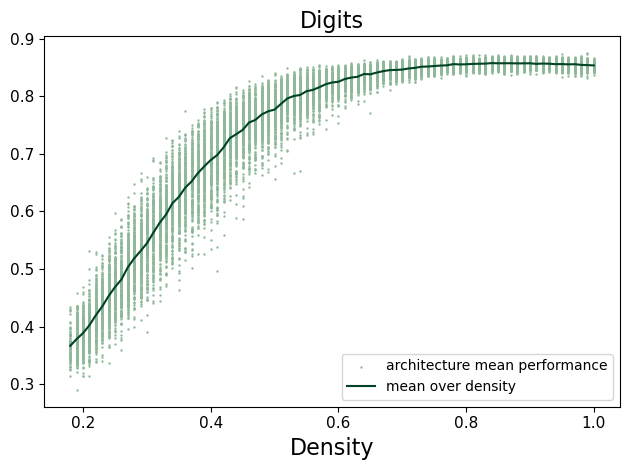

In [9]:

x_metric_name = 'density'
y_metric_name = 'mean_performance'

x_data = first_analsis[x_metric_name]
means_y = []
mean_x = []
for x in sorted(first_analsis[x_metric_name].unique()):
    means_y.append(first_analsis[y_metric_name][x_data == x].mean())
    mean_x.append(x)
#x_data = x_data + np.random.normal(-0.008, 0.008, x_data.shape[0])
plt.scatter(x_data, first_analsis[y_metric_name], c=COLORS[3], s=0.5, label='architecture mean performance')

plt.plot(mean_x, means_y, c=greens[0], label='mean over density')
plt.legend()
#plt.ylabel("Network's mean performance", fontsize=16)
plt.xlabel('Density', fontsize=16)
plt.title(
    f"{task.capitalize()}",
    wrap=True, fontsize=16)
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
plt.tight_layout()
plt.savefig(
    f"{plot_path}/{time_str}_{task}_{y_metric_name}_vs_{x_metric_name}.png")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/noamazmon/PycharmProjects/network_modularity/plots/for_poster/digits_3_layers_6_6/2023-10-22-17-54-56_digits_mean_performance_hist.png'

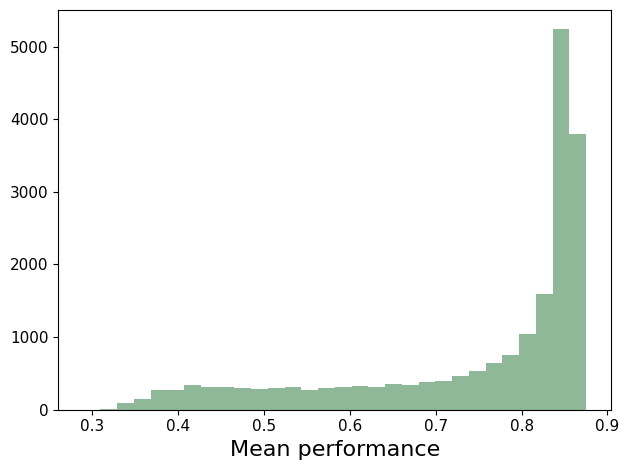

In [22]:
plt.hist(first_analsis['mean_performance'], color=COLORS[3], bins=30)
plt.xlabel('Mean performance',fontsize=16)
#plt.ylabel('Number of networks', fontsize=12)
#plt.title(f"{task.capitalize()}", fontsize=14)
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
plt.tight_layout()
plt.savefig(
    f"{plot_path}/{time_str}_{task}_mean_performance_hist.png")
plt.show()

In [23]:
lgb_res_path = f"{results_path}/{res_folder}/lightgbm_feature_selection/{lgbm_folder_name}"
lgb_res_nn_path = f"{lgb_res_path}/teach_archs_regression_feature_selection_results"

In [38]:
res = pd.read_csv(f"{lgb_res_path}/6_feature_values.csv").drop("Unnamed: 0", axis=1)


In [39]:
selected_feature_names = list(res.columns)[:-1]

FileNotFoundError: [Errno 2] No such file or directory: '/Users/noamazmon/PycharmProjects/network_modularity/plots/for_poster/digits_3_layers_6_6/2023-10-22-17-54-56_digits_six_fetaures_dist.png'

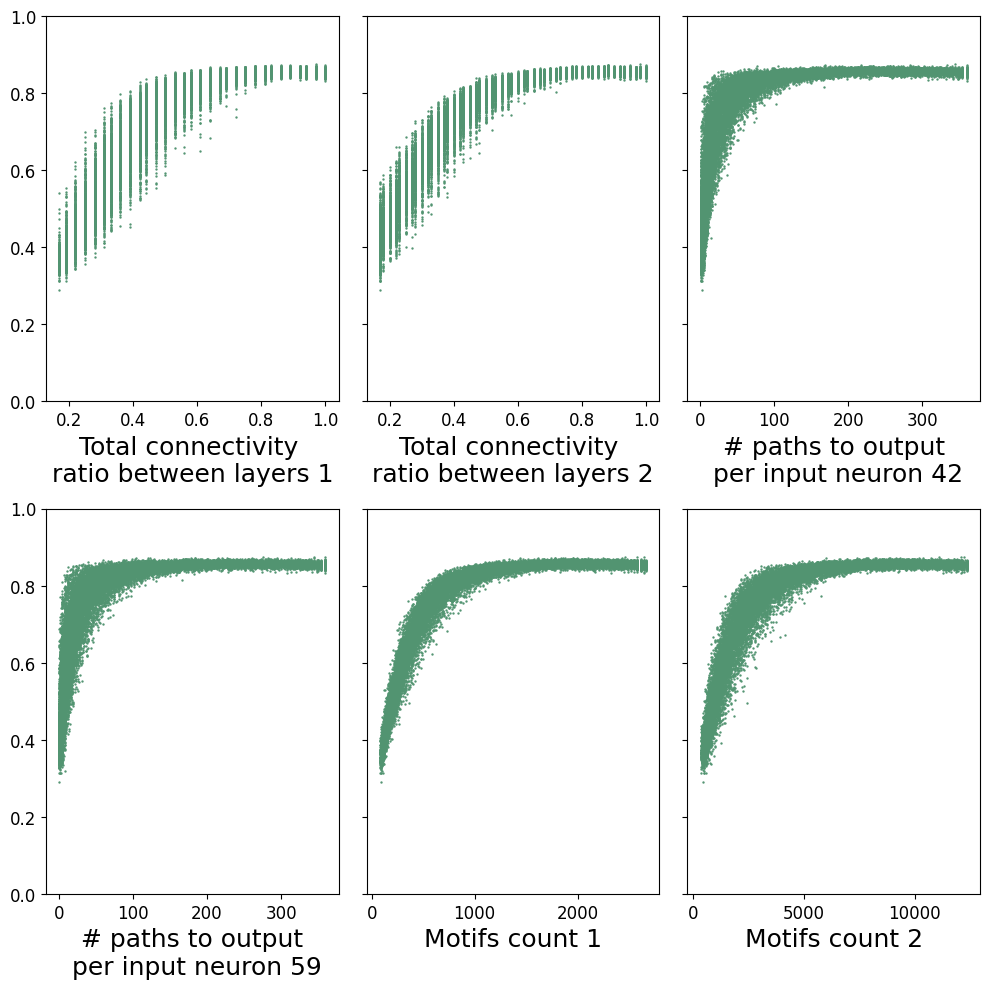

In [40]:
num_columns = int(np.ceil(len(selected_feature_names) / 3))
fig, axs = plt.subplots(num_columns, 3, figsize=(10, 10), sharey='all')
min_x = 1.0
max_x = 0
idxs = []
r, c, = axs.shape
for i in range(r):
    for j in range(c):
        idxs.append((i, j))
for k, (f_name, (i, j)) in enumerate(zip(selected_feature_names, idxs)):
    x_data = res[f_name]
    # if  len(set(res[f_name])) < 15:
    #     x_data = x_data + np.random.normal(-0.1, 0.1, len(x_data))
    axs[i, j].scatter(x_data, res['label'], color=greens[1], s=0.5)
    if 'per_input' in f_name:
        neuron = f_name.split('(')[1].split(' ')[1].split(')')[0]
        f_name = f_name.split('(')[0].replace('num', '#') + neuron
        if len(f_name) > 30:
            name = f"{f_name.replace('_', ' ')[:17]}\n{f_name.replace('_', ' ')[17:]}"
    elif len(f_name) > 30:
        name = f"{f_name.replace('_', ' ')[:19]}\n{f_name.replace('_', ' ')[19:]}"
    else:
        name = f"{f_name.replace('_', ' ')}"
    #axs[i, j].set_title(f"{name}", wrap=True)
    axs[i, j].set_xlabel(f"{name.capitalize()}",   fontsize=18)
    axs[i, j].set_ylim(0,1)
    axs[i, j].tick_params(axis='x', labelsize=12)
    axs[i, j].tick_params(axis='y', labelsize=12)
#plt.suptitle('Digit',  fontsize=14)
plt.tight_layout()
plt.savefig(
    f"{plot_path}/{time_str}_{task}_six_fetaures_dist.png")


In [19]:

res = pd.read_csv(f"{lgb_res_path}/4_feature_values.csv").drop("Unnamed: 0", axis=1)

selected_feature_names = list(res.columns)[:-1]

FileNotFoundError: [Errno 2] No such file or directory: '/Users/noamazmon/PycharmProjects/network_modularity/plots/for_poster/digits_3_layers_6_6/2023-10-22-17-54-56_digits_four_fetaures_dist.png'

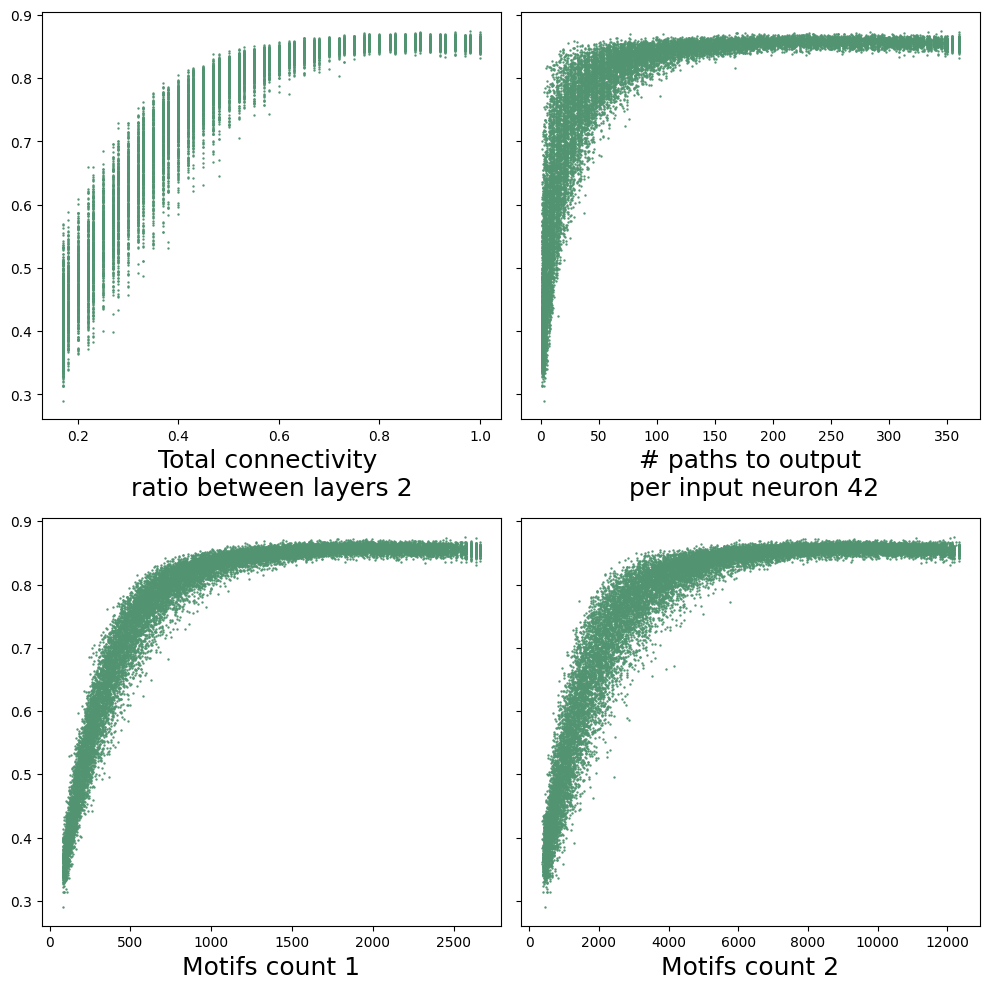

In [29]:
num_columns = int(np.ceil(len(selected_feature_names) / 3))
fig, axs = plt.subplots(num_columns, 2, figsize=(10, 10), sharey='all')
min_x = 1.0
max_x = 0
idxs = []
r, c, = axs.shape
for i in range(r):
    for j in range(c):
        idxs.append((i, j))
for k, (f_name, (i, j)) in enumerate(zip(selected_feature_names, idxs)):
    x_data = res[f_name]
    # if  len(set(res[f_name])) < 15:
    #     x_data = x_data + np.random.normal(-0.1, 0.1, len(x_data))
    axs[i, j].scatter(x_data, res['label'], color=greens[1], s=0.5)
    if 'per_input' in f_name:
        neuron = f_name.split('(')[1].split(' ')[1].split(')')[0]
        f_name = f_name.split('(')[0].replace('num', '#') + neuron
        if len(f_name) > 30:
            name = f"{f_name.replace('_', ' ')[:17]}\n{f_name.replace('_', ' ')[17:]}"
    elif len(f_name) > 30:
        name = f"{f_name.replace('_', ' ')[:19]}\n{f_name.replace('_', ' ')[19:]}"
    else:
        name = f"{f_name.replace('_', ' ')}"
    #axs[i, j].set_title(f"{name}", wrap=True)
    axs[i, j].set_xlabel(f"{name.capitalize()}",   fontsize=18)
#axs[1, 0].set_ylabel(f"Mean performance", fontsize=14)
#axs[0, 0].set_ylabel(f"Mean performance", fontsize=14)

#plt.suptitle('Digit',  fontsize=14)
plt.tight_layout()
plt.savefig(
    f"{plot_path}/{time_str}_{task}_four_fetaures_dist.png")


In [7]:

for file in os.listdir(f"{results_path}/{res_folder}/lightgbm_feature_selection/{lgbm_folder_name}"):
    if 'feature_selectio' in file:
        feature_selection = pd.read_csv(f"{first_analsis_res_folder}/{first_analsis_file_name}")
lgb_res_nn_path = f"{results_path}/{res_folder}/lightgbm_feature_selection/{lgbm_folder_name}/teach_archs_regression_feature_selection_results"
num_features = []
res = pd.DataFrame()
for file_name in os.listdir(lgb_res_nn_path):
    if 'best.csv' not in file_name:
        continue
    temp = pd.read_csv(f"{lgb_res_nn_path}/{file_name}")
    temp['num_features'] = int(file_name.split('only_')[1].split('_features')[0])
    res = pd.concat([res, temp], ignore_index=True)
res = res.sort_values('num_features')


In [13]:
res_to_plot =  res[res['num_features']<=100][res['num_features']!=1]


/var/folders/gp/pmfbgzrs0d53zz73ftvp7sg80000gn/T/ipykernel_9544/1128132907.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  res_to_plot =  res[res['num_features']<=100][res['num_features']!=1]


FileNotFoundError: [Errno 2] No such file or directory: '/Users/noamazmon/PycharmProjects/network_modularity/plots/for_poster/digits_3_layers_6_6/2023-10-22-16-11-49_digits_nn_feature_selection_r2_mape.png'

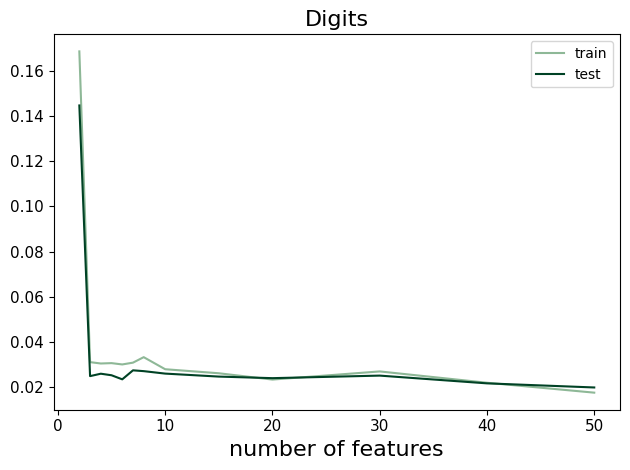

In [14]:
plt.plot(res_to_plot['num_features'], res_to_plot['best mape train'], label='train', c=COLORS[3])
plt.plot(res_to_plot['num_features'], res_to_plot['best mape test'], label='test',c=greens[0])

plt.xlabel('number of features',  fontsize=16)
#plt.ylabel(f'Mean absolute percentage error',  fontsize=16)
plt.legend()
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
plt.title(
    f"{task.capitalize()}",
    wrap=True, fontsize=16)
plt.tight_layout()
plt.savefig(
    f"{plot_path}/{time_str}_{task}_nn_feature_selection_r2_mape.png")
plt.show()

In [15]:
res_to_plot

,Unnamed: 0,best ephoc,best mape train,best mape test,best mse train,best mse test,best r2 train,best r2 test,num_features
14,0,156,0.168789,0.144811,0.000155,0.000129,-0.234206,0.243858,2
10,0,478,0.030961,0.024759,0.000027,0.000021,0.962629,0.979214,3
7,0,440,0.030358,0.025826,0.000027,0.000023,0.965294,0.976588,4
0,0,406,0.030519,0.025140,0.000027,0.000022,0.965760,0.978328,5
4,0,397,0.029936,0.023331,0.000026,0.000021,0.964952,0.980898,6
15,0,441,0.030732,0.027321,0.000028,0.000025,0.963710,0.971720,7
12,0,487,0.033165,0.026966,0.000029,0.000024,0.958109,0.973332,8
16,0,488,0.027814,0.025875,0.000025,0.000024,0.970697,0.974593,10
2,0,481,0.026026,0.024549,0.000023,0.000021,0.975370,0.979532,15
13,0,494,0.023229,0.023853,0.000020,0.000021,0.980556,0.980502,20


In [34]:
model_res_path = f"{results_path}/{res_folder}/lightgbm_feature_selection/{lgbm_folder_name}/"
for f in os.listdir(model_res_path):
    if 'prediction_results.csv' in f:
        break
res = pd.read_csv(f"{model_res_path}/6_prediction_results.csv")


In [35]:
res.shape

(2001, 3)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/noamazmon/PycharmProjects/network_modularity/plots/for_poster/digits_3_layers_6_6/2023-10-22-17-54-56_nn_model_pred_vs_actual.png'

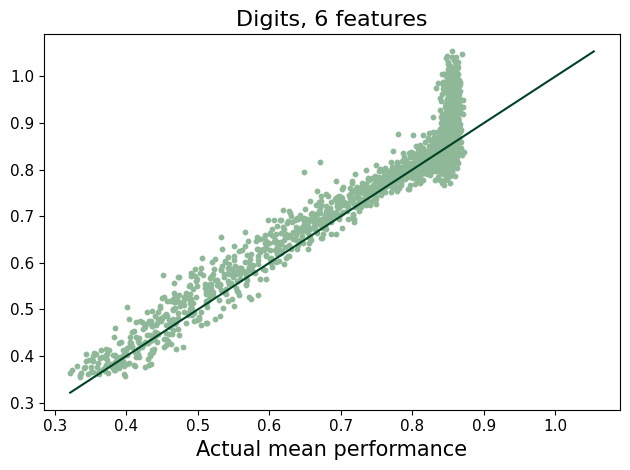

In [36]:
plt.scatter(res['test_label'], res['test_pred'], s=10, c=COLORS[3])
start = min(res['test_label'].min(), res['test_pred'].min())
stop = max(res['test_label'].max(), res['test_pred'].max())
plt.plot(np.linspace(start, stop, 50), np.linspace(start, stop, 50), c=greens[0])
#plt.ylabel('Predicted mean performance',  fontsize=15)
plt.xlabel('Actual mean performance',   fontsize=15)
plt.title(
    f"{task.capitalize()}, 6 features",
    wrap=True, fontsize=16)
plt.yticks(fontsize=11)
plt.xticks(fontsize=11)
plt.tight_layout()
plt.savefig(f"{plot_path}/{time_str}_nn_model_pred_vs_actual.png")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/noamazmon/PycharmProjects/network_modularity/plots/for_poster/digits_3_layers_6_6/2023-10-22-17-54-56_nn_model_pred_vs_actual.png'

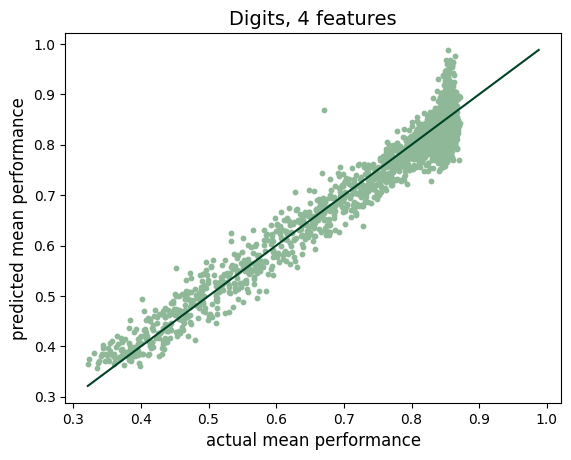

In [33]:

res = pd.read_csv(f"{model_res_path}/4_prediction_results.csv")

plt.scatter(res['test_label'], res['test_pred'], s=10, c=COLORS[3])
start = min(res['test_label'].min(), res['test_pred'].min())
stop = max(res['test_label'].max(), res['test_pred'].max())
plt.plot(np.linspace(start, stop, 50), np.linspace(start, stop, 50), c=greens[0])
plt.ylabel('predicted mean performance', fontsize=12)
plt.xlabel('actual mean performance', fontsize=12)
plt.title(
    f"{task.capitalize()}, 4 features",
    wrap=True, fontsize=14)
plt.savefig(f"{plot_path}/{time_str}_nn_model_pred_vs_actual.png")
plt.show()

In [33]:
model_res_path

'/Volumes/noamaz/modularity/digits//digits_3_layers_8_4/lightgbm_feature_selection/exp_2023_09_15_14_35_0_nice_features/'